<a href="https://www.kaggle.com/code/dilekdd/pandas-exercises-1?scriptVersionId=195305408" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

Define the Titanic data set within the Seaborn library.

In [2]:
df = sns.load_dataset("titanic")
df.columns
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Find the number of male and female passengers in the Titanic data set described above.

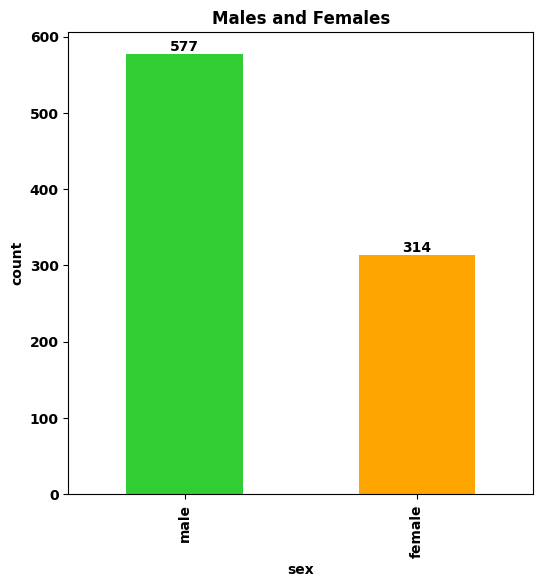

In [3]:
plt.figure(figsize=(6, 6)) #Graph size

ax = df['sex'].value_counts().plot(kind="bar", color=['limegreen', 'orange'])

#Graph display settings
plt.xlabel("sex", fontweight='bold')
plt.ylabel("count", fontweight='bold')
plt.title("Males and Females", fontweight='bold')

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

#Graph Data Labels
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10, fontweight='bold')

plt.show()

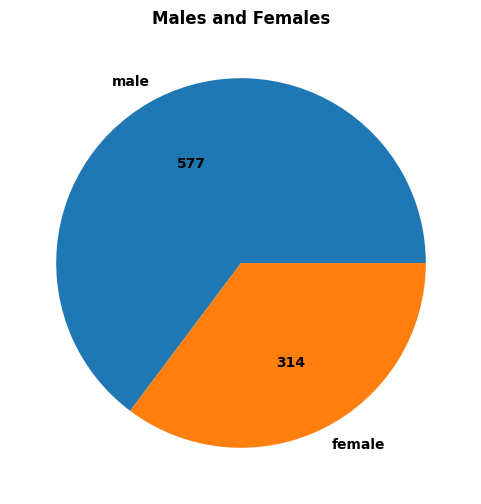

In [4]:
plt.figure(figsize=(6, 6))
counts = df['sex'].value_counts()
ax = counts.plot(kind="pie", color=['limegreen', 'orange'],
                 autopct=lambda p: f'{int(p * sum(counts) / 100)}', textprops={'fontweight': 'bold'})
plt.ylabel('')
plt.title("Males and Females", fontweight='bold')
plt.show()

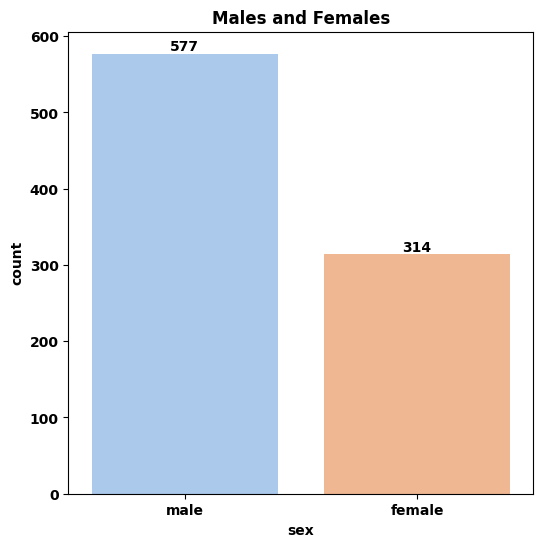

In [5]:
plt.figure(figsize=(6, 6)) #Graph size
ax = sns.countplot(x='sex', data=df, palette='pastel')

#Graph display settings
plt.xlabel("sex", fontweight='bold')
plt.ylabel("count", fontweight='bold')
plt.title("Males and Females", fontweight='bold')

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

#Adding data labels on each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10, fontweight='bold')

plt.show()

Find the number of unique values ​​for each column.

In [6]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

Find the unique values ​​of the pclass variable.

In [7]:
df["pclass"].unique()


array([3, 1, 2])

Find the number of unique values ​​of the pclass and parch variables.

In [8]:
df[["pclass", "parch"]].nunique()

pclass    3
parch     7
dtype: int64

Check the type of the embarked variable. Change its type to category. Check the type again.

In [9]:
df["embarked"].dtypes

dtype('O')

In [10]:
print(df["embarked"].astype("category").dtypes)

category


Show all the information of those whose embarked value is C.

In [11]:
embarked_df = df[df["embarked"] == "C"]
embarked_df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
30,0,1,male,40.0,0,0,27.7208,C,First,man,True,NaN,Cherbourg,no,True


Bring all the information for which the embarked value is not S.

In [12]:
embarked_df = df[df["embarked"] != "S"]
embarked_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True


In [13]:
df[df["embarked"] != "S"]["embarked"].unique()

array(['C', 'Q', nan], dtype=object)

Show all information of passengers who are under 30 years old and female.

In [14]:
task_9 = df[(df["age"] < 30) & (df["sex"] == 'female')]
task_9.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True


Show information of passengers whose fare is over 500 or whose age is over 70.

In [15]:
task_10 = df[(df["fare"] > 500) | (df["age"] > 70)]
task_10

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True


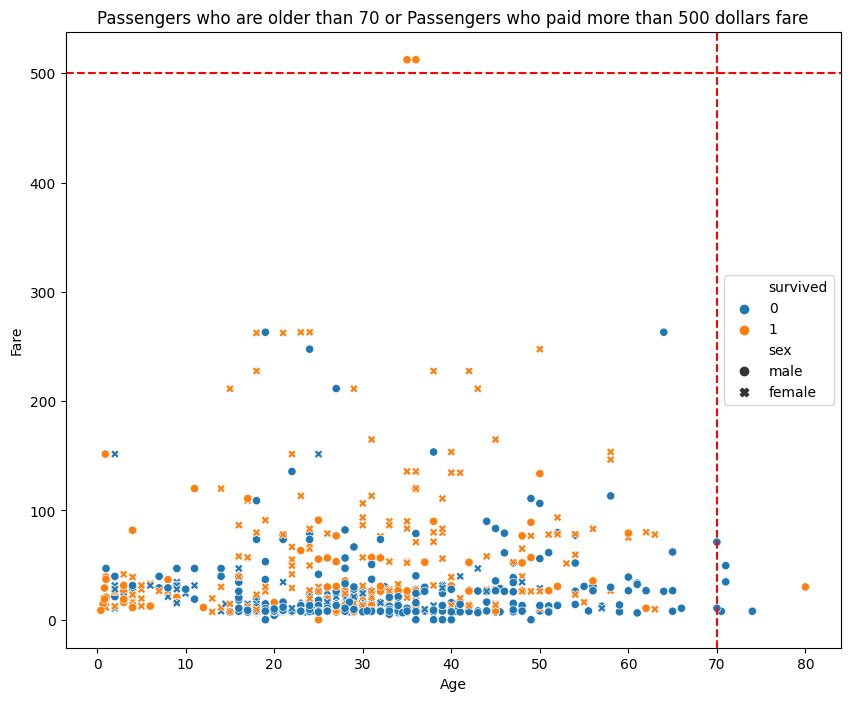

In [16]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="age", y="fare", data=df, hue="survived", style='sex')
plt.axhline(y=500, color='r', linestyle='--')
plt.axvline(x=70, color='r', linestyle='--')
plt.title('Passengers who are older than 70 or Passengers who paid more than 500 dollars fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(loc='center right')
plt.show()

Find the sum of the null values ​​in each variable.

In [17]:
task_11 = df.isnull().sum()
print(task_11)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


Drop the who variable from the dataframe.

In [18]:
reduce_who = df.drop("who", axis=1)
reduce_who.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True,NaN,Southampton,no,True


Fill the blank values ​​in the deck variable with the most frequently occurring value of the deck variable (mode).

In [19]:
deck_mode = df['deck'].mode()[0]
print(f"Deck Mode is {deck_mode}")

df.fillna({"deck": deck_mode}, inplace=True)

df.head()

Deck Mode is C


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


Fill the blank values ​​in the age variable with the median of the age variable.

In [20]:
age_median = df['age'].median()
print(f"Age Median is {age_median}")

df.fillna({"age": age_median}, inplace=True)

df.tail()

Age Median is 28.0


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.45,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,C,Queenstown,no,True


Calculate the sum, count, and mean of the 'Survived' variable, broken down by 'Pclass' and 'Sex'

In [21]:
df.groupby(["pclass", "sex"]).agg({"survived": ["sum", "count", "mean"]})

survived                
                   sum count      mean
pclass sex                            
1      female       91    94  0.968085
       male         45   122  0.368852
2      female       70    76  0.921053
       male         17   108  0.157407
3      female       72   144  0.500000
       male         47   347  0.135447

Write a function that will give 1 to those under 30, 0 to those over and equal to 30.
Create a variable named age_flag in the titanic dataset using the function you wrote. (Use apply and lambda structures)

In [22]:
def age_check(dataframe, age_th=30):
    dataframe["age_flag"] = dataframe["age"].apply(lambda x: 1 if x < age_th else 0)
    return dataframe

df = age_check(df, age_th=30)
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_flag
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,0
